In [1]:
import getpass
user = input('EPM user:')
password = getpass.getpass("EPM password:")

EPM user:sa
EPM password:········


In [2]:
%%time
import epmwebapi as epm
import numpy as np
import datetime


#crie o objeto de conexão informando os endereços do EPM Webserver(Authentication Port e WEB API Port), usuário e senha.
connection = epm.EpmConnection('http://localhost:44333', 'http://localhost:44332', user, password)

#nomes das basic variables
wind = 'SP01_WindSpeedAvg'
power = 'SP01_PowerAvg'
direction = 'SP01_WindDirection'

#intervalo da consulta
initime = datetime.datetime(2014, 3, 1, 0, 0, 0, 0)
endtime = initime + datetime.timedelta(days=5)

#busca o objeto no EPM Server
bv_wind = connection.getDataObjects([wind])
bv_power = connection.getDataObjects([power])
bv_direction = connection.getDataObjects([direction])

#confugura a consulta
queryperiod = epm.QueryPeriod(initime, endtime)
processInterval = datetime.timedelta(seconds=600)
aggregationdetails = epm.AggregateDetails(processInterval, epm.AggregateType.Interpolative)

#realiza a consulta
wind_data = bv_wind[wind].historyReadAggregate(aggregationdetails, queryperiod)
power_data = bv_power[power].historyReadAggregate(aggregationdetails, queryperiod)
direction_data = bv_direction[direction].historyReadAggregate(aggregationdetails, queryperiod)

#fechando a conexão
connection.close()

Wall time: 10.3 s


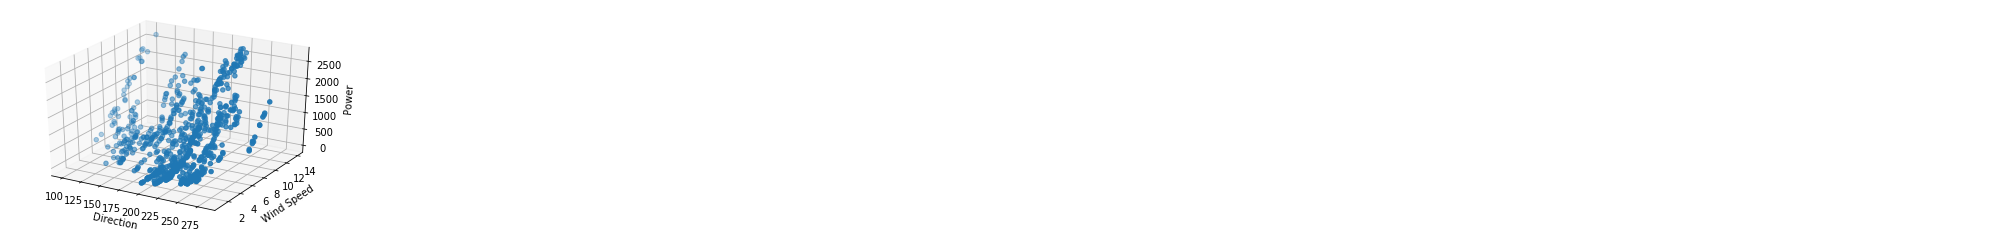

In [5]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

x, y, z = direction_data['Value'], wind_data['Value'], power_data['Value']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)

ax.set_xlabel('Direction')
ax.set_ylabel('Wind Speed')
ax.set_zlabel('Power')
plt.show()
